# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them next week, but we will be using some of their functionalities.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [2]:
#importing the data
diamonds = pd.read_csv('diamonds.csv')

#dropping the first column
diamonds.drop(diamonds.columns[0], axis=1, inplace=True)

# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [3]:
#Print the first 5 lines of data of the dataframe
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [4]:
#We see multiples columns with either text or numbers. If we compare to what is described in the codebook,
#the values of each columns is what we are excepting from them.

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [5]:
#getting the shape of the data
diamonds.shape

(53940, 10)

The `clarity` column is confusing because we are not diamond experts. Let's create a new column with a new scale that is more understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [6]:
#A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
#Let's define a function which will do the translation

def clarity_measurement(clarity_row):
    if clarity_row == 'I1':
        return 0;
    elif clarity_row == 'SI2':
        return 1;
    elif clarity_row == 'SI1':
        return 2;
    elif clarity_row == 'VS2':
        return 3;
    elif clarity_row == 'VS1':
        return 4;
    elif clarity_row == 'VVS2':
        return 5;
    elif clarity_row == 'VVS1':
        return 6;
    else:
        return 7;

In [7]:
#Addition of the new clarity column 
diamonds['clarity_measurement'] = diamonds['clarity'].apply(clarity_measurement)

#Checking the results
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_measurement
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [8]:
#Let's make a new function to convert the color from letters to numbers from J (worst) to D (best)
def color_values(color_row):
    if color_row == 'J':
        return 0;
    elif color_row == 'I':
        return 1;
    elif color_row == 'H':
        return 2;
    elif color_row == 'G':
        return 3;
    elif color_row == 'F':
        return 4;
    elif color_row == 'E':
        return 5;
    else :
        return 6;

In [9]:
#Addition of the new color column 
diamonds['color_measurement'] = diamonds['color'].apply(color_values)

#Checking the results
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_measurement,color_measurement
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0


With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [10]:
diamonds.info()

#info gives us more information as it gives us the size of the dataframe (which we have with shape) 
#but also the different columns and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carat                53940 non-null  float64
 1   cut                  53940 non-null  object 
 2   color                53940 non-null  object 
 3   clarity              53940 non-null  object 
 4   depth                53940 non-null  float64
 5   table                53940 non-null  float64
 6   price                53940 non-null  int64  
 7   x                    53940 non-null  float64
 8   y                    53940 non-null  float64
 9   z                    53940 non-null  float64
 10  clarity_measurement  53940 non-null  int64  
 11  color_measurement    53940 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 4.9+ MB


In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [11]:
#The types of each column matches with what is expected from the description of it from the codebook.

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [12]:
diamonds.describe()

#The describe method gives us basic statistical details like percentile, mean, std etc, of each column of our dataframe

,carat,depth,table,price,x,y,z,clarity_measurement,color_measurement
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,3.051020,3.405803
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.647136,1.701105
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000


You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [13]:
diamonds[(diamonds.x == 0) | (diamonds.y == 0) | (diamonds.z == 0)]

#The diamonds which have a value 0 in one of the x, y or z column have a smaller shape

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_measurement,color_measurement
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,1,3
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0,2
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,1,3
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,1,4
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0,3
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,1,4
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,3,2
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,3,3
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,4,3
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,1,2


As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [14]:
#Total depth percentage = z / mean(x, y)
def calculate_z(row):
    return (diamonds['depth']/100) * diamonds[['x','y']].mean(axis=1)

**Apply it just to the rows with incorrect values**

In [15]:
#We want to modify the z values with the right values for rows where x or y are non null
index_z_which_can_be_calculated = list(diamonds[((diamonds.x != 0) | (diamonds.y != 0)) & (diamonds.z == 0)]['z'].index)

In [16]:
index_z_which_can_be_calculated

[2207,
 2314,
 4791,
 5471,
 10167,
 11182,
 13601,
 24394,
 26123,
 27112,
 27503,
 27739,
 51506]

In [17]:
#diamonds['z'] = diamonds['z'].apply(calculate_z)
diamonds.loc[index_z_which_can_be_calculated, ['z']] = diamonds.loc[index_z_which_can_be_calculated, ['z']].apply(calculate_z)

In [18]:
diamonds.loc[index_z_which_can_be_calculated, ['z']]

,z
2207,3.850365
2314,3.852030
4791,4.085550
5471,3.839120
10167,4.540800
11182,2.038960
13601,4.058160
24394,5.031180
26123,5.192110
27112,5.137740


If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [19]:
diamonds['z'].replace(0,np.nan, inplace=True)

----
# Bonus: check the new z values
Since we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [20]:
#Total depth percentage = z / mean(x, y)
#We are checking the absolute value between the two series. 
#If they have a really small difference (as they are floats), then we can validate the data
def validate_z(row):
    epsilon = 1e-6
    if np.abs(row['depth']/100 - row['z'] / row[['x','y']].mean()) < epsilon:
        return True
    else:
        False

In [21]:
#Applying the function to the data we calculated
diamonds.loc[index_z_which_can_be_calculated].apply(validate_z, axis=1)

2207     True
2314     True
4791     True
5471     True
10167    True
11182    True
13601    True
24394    True
26123    True
27112    True
27503    True
27739    True
51506    True
dtype: bool

Let's check the data again with the `describe()` method.

In [22]:
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_measurement,color_measurement
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.540238,3.051020,3.405803
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.702690,1.647136,1.701105
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,1.070000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000


The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [23]:
#Find columns with missing data
diamonds.isnull().any()

carat                  False
cut                    False
color                  False
clarity                False
depth                  False
table                  False
price                  False
x                      False
y                      False
z                       True
clarity_measurement    False
color_measurement      False
dtype: bool

In [24]:
#Getting the number of missing data in the z column
diamonds['z'].isnull().sum()

7

In [25]:
#To not impact the data with those missing datas, we will remove them.
diamonds.dropna(inplace=True)

# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [26]:
#your code here
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_measurement,color_measurement
count,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000
mean,0.797884,61.749333,57.457002,3932.155026,5.731901,5.735270,3.540238,3.051063,3.405800
std,0.473983,1.432501,2.234052,3988.700283,1.119932,1.140339,0.702690,1.647118,1.701151
min,0.200000,43.000000,43.000000,326.000000,0.000000,3.680000,1.070000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,4.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000


In [27]:
#From the codebook, the greater depth is 31.8, however we have a max of 566 for z. 

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [28]:
#Identifying Outliers with Interquartile Range (IQR = Q3 − Q1)
Q1 = diamonds['price'].quantile(0.25)
Q3 = diamonds['price'].quantile(0.75)
IQR = Q3 - Q1

# Print the IQR scores for price
print(IQR)

4374.0


In [29]:
#We want to find outliers that have a price higher than the 75th percentile. 
#An outlier is defined as being any point of data that lies over 1.5 IQRs below the first quartile (Q1) or 
#above the third quartile (Q3) in a data set.
diamonds[diamonds.price > (Q3 + 1.5 * IQR)]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_measurement,color_measurement
23820,1.17,Ideal,F,VVS1,62.1,57.0,11886,6.82,6.73,4.21,6,4
23821,2.08,Ideal,I,SI2,62.0,56.0,11886,8.21,8.10,5.06,1,1
23822,1.70,Premium,I,VS2,62.2,58.0,11888,7.65,7.60,4.74,3,1
23823,1.09,Ideal,F,IF,61.6,55.0,11888,6.59,6.65,4.08,7,4
23824,1.68,Ideal,E,SI2,60.4,55.0,11888,7.79,7.70,4.68,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,2,2
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,1,3
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,7,3
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,2,3


Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

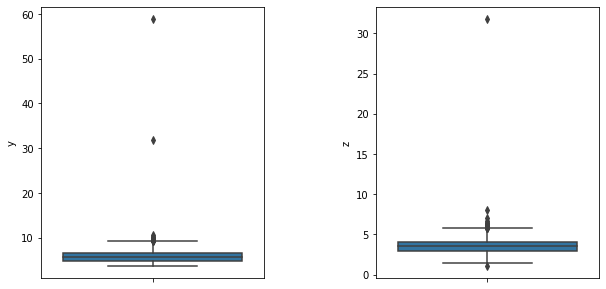

In [30]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [31]:
#Filtering the outliers in y
diamonds[diamonds.y > 10]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_measurement,color_measurement
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,1,2
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,0,1
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,0,0
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,0,0
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,4,5


In [32]:
#Filtering the outliers in z
diamonds[diamonds.z > 6.35]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_measurement,color_measurement
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38,0,2
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,1,2
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43,0,2
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,0,0
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,0,0
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,4,5


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [33]:
#index of the outliers in the column z
index_z_outliers = list(diamonds[diamonds.z > 6.35].index)
index_z_outliers

[23644, 24067, 27130, 27415, 27630, 48410]

In [34]:
#Changing the value of the outliers in z to 0
diamonds.loc[index_z_outliers, ['z']] = 0

In [35]:
 #Applying calculate_z
diamonds.loc[index_z_outliers, ['z']] = diamonds.loc[index_z_outliers, ['z']].apply(calculate_z)

In [36]:
diamonds.loc[index_z_outliers, ['z']]

,z
23644,6.377855
24067,19.728555
27130,6.431400
27415,6.969200
27630,6.708310
48410,3.173430


Let's check if we actually corrected the outlier.

In [37]:
diamonds.loc[48410]

carat                       0.51
cut                    Very Good
color                          E
clarity                      VS1
depth                       61.8
table                       54.7
price                       1970
x                           5.12
y                           5.15
z                        3.17343
clarity_measurement            4
color_measurement              5
Name: 48410, dtype: object

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [38]:
#Applying validate_z to the z outliers that we calculted with calculate_z
diamonds.loc[index_z_outliers].apply(validate_z, axis=1)

23644    True
24067    True
27130    True
27415    True
27630    True
48410    True
dtype: bool

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [39]:
#Filtering the outliers in y
diamonds[diamonds.y > 10]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_measurement,color_measurement
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,19.728555,1,2
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.170000,0,1
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.969200,0,0
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.708310,0,0
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.120000,4,5


In [40]:
#Saving the index so that we can check them after 
index_y_outliers = list(diamonds[diamonds.y > 10].index)

We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [50]:
#Defining calculate_y using the other way to calculate the Total depth percentage = 2 * z / (x + y)
def calculate_y(row):
    return (200*row.z / (row.depth)) - row.x

In [51]:
#Applying calculate_y 
diamonds.loc[index_y_outliers, ['y']] = diamonds.loc[index_y_outliers].apply(calculate_y, axis=1)

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

In [52]:
diamonds.loc[index_y_outliers, ['y']]

,y
24067,58.900000
25998,10.089508
27415,10.540000
27630,10.160000
49189,11.419579


In [56]:
#let's use the function validate_z to validate y as the two are interconnected
diamonds.loc[index_y_outliers].apply(validate_z, axis=1)

24067    True
25998    True
27415    True
27630    True
49189    True
dtype: bool

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

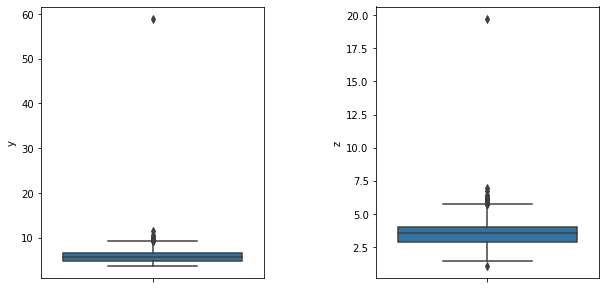

In [54]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [46]:
#We still have one outlier for y and z.

In [57]:
diamonds[diamonds.y > 50]
#The outlier for x and y is at the row 24067, so we will drop that row

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_measurement,color_measurement
24067,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,19.728555,1,2


In [61]:
diamonds.drop([24067],inplace=True)

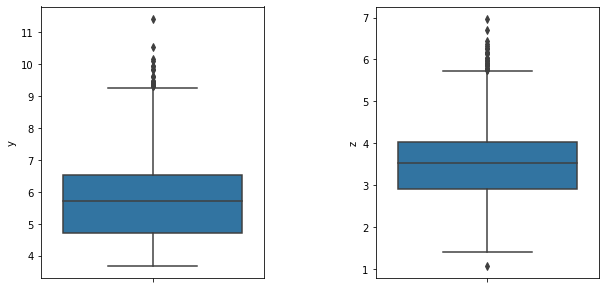

In [62]:
#Double-ckeck with box-plot
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean``**

In [63]:
#Saving datframe to csv file
diamonds.to_csv('diamonds_clean.csv', index=False, header=True)